In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax, Adam, SGD, Adagrad ,RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Mini prj/Code/Rice_MSC_Dataset.xlsx")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [ ]:
synth=pd.read_csv("/content/drive/MyDrive/Code/realtime_data.csv")
synth.head()

FileNotFoundError: ignored

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mini prj/Code/synthetic_data.csv")
label_encoder = preprocessing.LabelEncoder()
df['CLASS']= label_encoder.fit_transform(df['CLASS'])
df = df.dropna()
X=df.drop(['CLASS'],axis=1)
y=df.CLASS
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Mini prj/Code/ANN_model.h5')
model.evaluate(X_test, y_test)
prob = model.predict(X_test)
labels = prob.argmax(axis=1)
print(accuracy_score(y_test,labels))

8/8 [==============================] - 0s 4ms/step - loss: 1.3806 - accuracy: 0.7880
0.788


In [ ]:
prob = model.predict(X_test)
labels = prob.argmax(axis=1)
labels

array([4, 2, 1, 1, 1, 2, 0, 0, 3, 3, 1, 4, 3, 3, 2, 2, 2, 4, 3, 0, 0, 2,
       1, 2, 1, 4, 1, 4, 1, 4, 2, 4, 4, 3, 2, 2, 0, 1, 0, 4, 0, 1, 1, 2,
       4, 4, 1, 1, 1, 3, 1, 1, 0, 4, 4, 2, 2, 4, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,labels)

0.11666666666666667

In [ ]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



In [ ]:
score_mse_test = model.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = model.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)


469/469 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9989
Test Score: [0.07092532515525818, 0.9989332556724548]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9994
Train Score: [0.005439203232526779, 0.9993665814399719]


In [ ]:
print(confusion_matrix(y_test, y_pred_bool))

[[3044    0    0    4    0]
 [   0 3047    0    3    0]
 [   0    0 3000    0    0]
 [   1    0    0 2913    0]
 [   7    0    0    1 2979]]


In [ ]:
#adagrad ,RMSprop, Adam, SGD, adamax, nandam
#sigmoid, softmax, tanh, relu

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['CLASS']= label_encoder.fit_transform(df['CLASS'])
synth['CLASS']= label_encoder.fit_transform(synth['CLASS'])
 
df['CLASS'].unique()
synth['CLASS'].unique()

array([0, 1])

In [ ]:
df = df.dropna()

In [ ]:
synth = synth.dropna()

In [ ]:
X1=df.drop(['CLASS'],axis=1)
y1=df.CLASS
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=1)
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)
pca = PCA().fit(X_train1)
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

In [ ]:
X=df.drop(['CLASS'],axis=1)
y=df.CLASS

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(59993, 106)

Artificial Neural Networks

Relu and softmax

In [ ]:
ANNmodel = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
# model = tf.keras.models.Sequential([
# #     tf.keras.layers.Dense(100, activation="relu")
#       tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
# #     tf.keras.layers.Dense(40, kernel_initializer = 'uniform', activation = 'relu'),
# #     tf.keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu'),
# #     tf.keras.layers.Dropout(0.2),
#       tf.keras.layers.Dense(units=5, activation = 'softmax')
# ])

In [ ]:
ANNmodel.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
r1 = ANNmodel.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

In [ ]:
print('Loss:    ', r.history['loss'][-1], '\nVal_loss: ', r.history['val_loss'][-1])

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Code/ANN_model.h5')

In [ ]:
prob = model.predict(X_test)
labels = prob.argmax(axis=1)
labels

array([0, 0, 2, ..., 2, 3, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,labels)

0.9991999466631108

In [ ]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



In [ ]:
len(labels)

14999

In [ ]:
score_mse_test = model.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = model.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9992
Test Score: [0.003972209524363279, 0.9991999268531799]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 0.9997
Train Score: [0.001221920014359057, 0.9996999502182007]


In [ ]:
# plt.figure(figsize=(15, 6))
# plt.plot(.history['loss'], lw =3, ls = '--', label = 'Loss')
# plt.plot(r.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
# plt.xlabel('Epochs', fontsize=15)
# plt.ylabel('Loss', fontsize=15)
# plt.title('MSE')
# plt.legend()

In [ ]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(model, X, y, cv=10, scoring="r2").mean())

Deep Neural Network

In [ ]:
modelDNN = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN.compile(optimizer=Adam(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN = modelDNN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

Epoch 1/20
59993/59993 [==============================] - 146s 2ms/step - loss: 0.0274 - accuracy: 0.9979 - val_loss: 0.0264 - val_accuracy: 0.9984
Epoch 2/20
59993/59993 [==============================] - 142s 2ms/step - loss: 0.0232 - accuracy: 0.9977 - val_loss: 0.0425 - val_accuracy: 0.9984
Epoch 3/20
59993/59993 [==============================] - 144s 2ms/step - loss: 0.0295 - accuracy: 0.9983 - val_loss: 0.0590 - val_accuracy: 0.9983
Epoch 4/20
59993/59993 [==============================] - 143s 2ms/step - loss: 0.0266 - accuracy: 0.9979 - val_loss: 0.1039 - val_accuracy: 0.9985
Epoch 5/20
59993/59993 [==============================] - 143s 2ms/step - loss: 0.0392 - accuracy: 0.9981 - val_loss: 0.0737 - val_accuracy: 0.9987
Epoch 6/20
59993/59993 [==============================] - 143s 2ms/step - loss: 0.0268 - accuracy: 0.9984 - val_loss: 0.1552 - val_accuracy: 0.9983
Epoch 7/20
59993/59993 [==============================] - 143s 2ms/step - loss: 0.0290 - accuracy: 0.9983 - val_

In [ ]:
 print('Loss:    ', rDNN.history['loss'][-1], '\nVal_loss: ', rDNN.history['val_loss'][-1])

Loss:     0.02891368232667446 
Val_loss:  0.03544287756085396


In [ ]:
score_mse_test = modelDNN.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9989
Test Score: [0.03544339910149574, 0.9989332556724548]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9994
Train Score: [0.0047147744335234165, 0.9993999004364014]


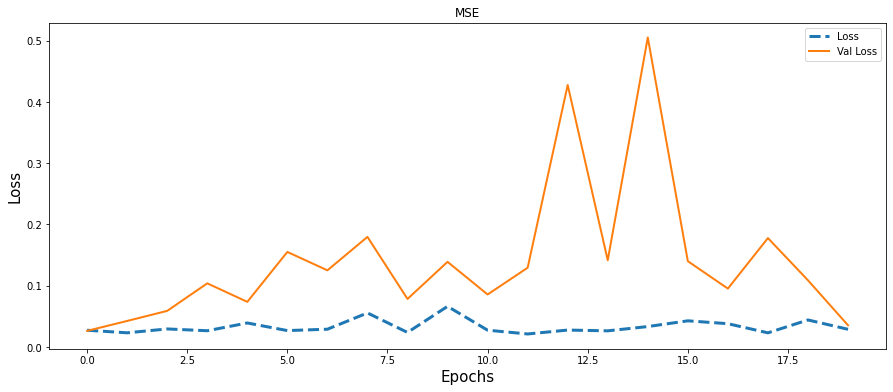

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(rDNN.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(rDNN.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('MSE')
plt.legend()